# EDA on Movie Data
---

Exploratory data analysis (EDA) on movie data:
- Author: Masud Rahman - https://masud90.github.io
- Dataset: `movies.csv` available on github at https://gist.github.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea ; uploaded by @tiangechen

In this notebook, we will take a dataset on top gross movies between 2007 and 2011, and run exploratory data analysis on the dataset.

## Initialize setup

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

## Load the dataset

In [5]:
df = pd.read_csv("movies.csv")

## Inspect the dataset
By inspecting the dataset, we will understand how to proceed with the EDA.

In [7]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [8]:
# Inspect the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [9]:
# Describe the numerical variable
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [10]:
# Check for missing values
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

## Pre-processing
We need to make some adjustments to the data before we conduct any analysis.

In [12]:
# The Worldwide Gross variable appears as object. We need to convert it to integer.
df['Worldwide Gross'] = df['Worldwide Gross'].replace(r'[\$,]', '', regex=True).astype(float) * 1e6
df['Worldwide Gross'] = df['Worldwide Gross'].astype(int)


In [13]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41940000,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19620000,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26660000,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,43040000,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219370000,2008


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     int32  
 7   Year               77 non-null     int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 4.6+ KB


In [15]:
# Check the categorical variables for inconsistencies 
print(df['Genre'].unique())
print(df['Lead Studio'].unique())

['Romance' 'Comedy' 'Drama' 'Animation' 'Fantasy' 'Romence' 'Comdy'
 'Action' 'romance' 'comedy']
['The Weinstein Company' 'Independent' 'Disney' 'Fox' '20th Century Fox'
 'Warner Bros.' 'Summit' 'Paramount' 'CBS' 'New Line' 'Sony' 'Universal'
 'Lionsgate']


In [16]:
# The Genre variable has 2 inconsistent category spellings. Let us fix this.
df['Genre'] = df['Genre'].replace({'Comdy': 'Comedy', 'comedy': 'Comedy','Romence': 'Romance', 'romance': 'Romance'})

# Check if fixed
print(df['Genre'].unique())

['Romance' 'Comedy' 'Drama' 'Animation' 'Fantasy' 'Action']


In [17]:
# Impute outliers for 'Profitability' with their highest or lowest IQR bounds
def impute_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df2[column] < lower_bound, column] = lower_bound
    df.loc[df2[column] > upper_bound, column] = upper_bound
    return df2

df = impute_outliers(df, 'Profitability')

# Check the updated dataset
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41940000,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19620000,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26660000,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,43040000,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219370000,2008


In [18]:
# Standardize categorical data
# The variable Genre has spelling inconsistencies. We need to identify the issues, and then ensure they are spelled correctly.
# Let us first look at all possible spellings that currently exists
df['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Action'],
      dtype=object)

In [19]:
# Now we will correct the inconsistencies
df['Genre'] = df['Genre'].replace({'Comdy': 'Comedy', 'comedy': 'Comedy', 'Romence': 'Romance', 'romance': 'Romance' })

# Verify the changes
df['Genre'].unique()


array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Action'],
      dtype=object)

## Exploratory Data Analysis

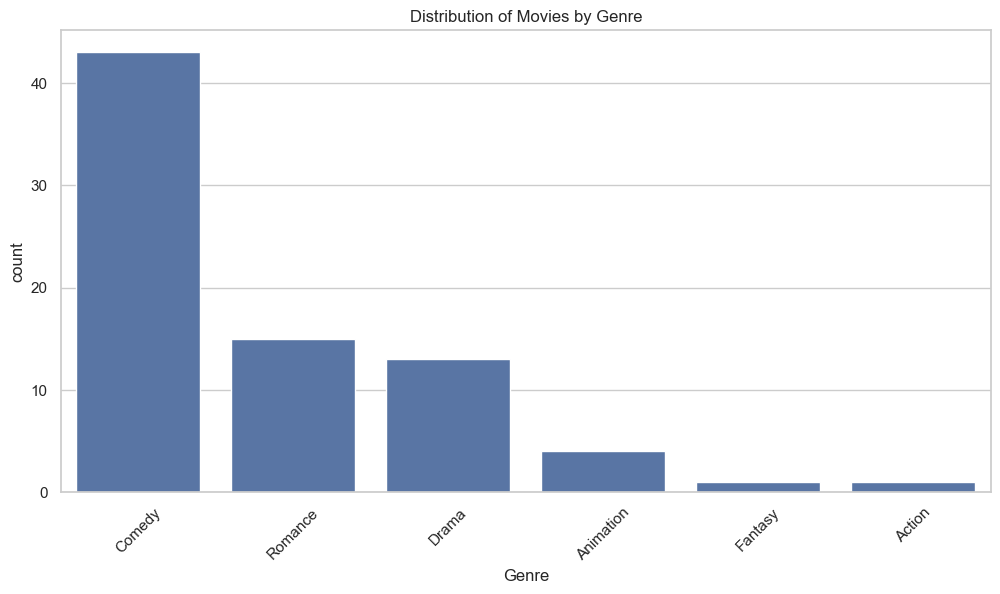

In [21]:
# Distribution of Movies by Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=45)
plt.show()

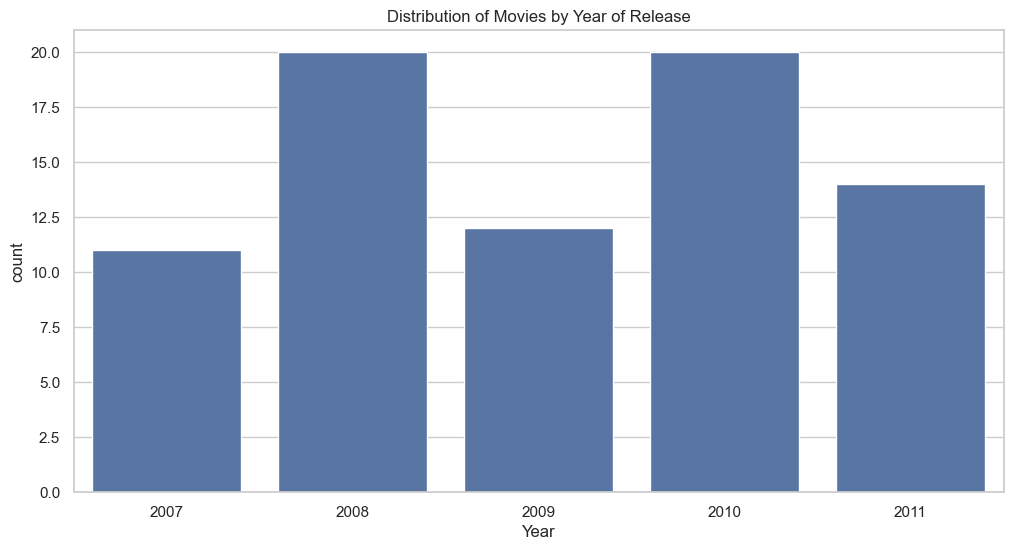

In [22]:
# Distribution of Movies by Year of Release
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title('Distribution of Movies by Year of Release')
plt.show()

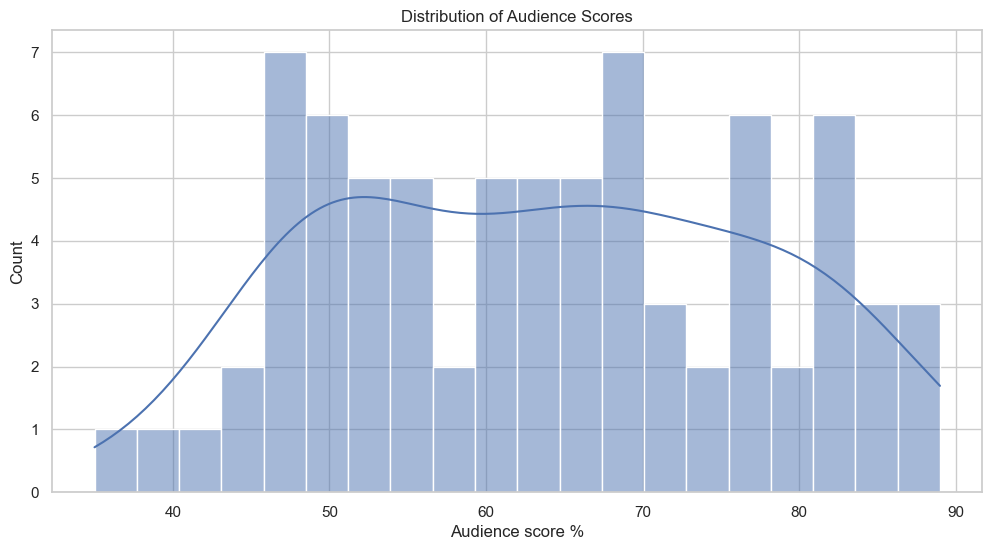

In [23]:
# Distribution of Audience Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Audience score %'], bins=20, kde=True)
plt.title('Distribution of Audience Scores')
plt.xlabel('Audience score %')
plt.show()

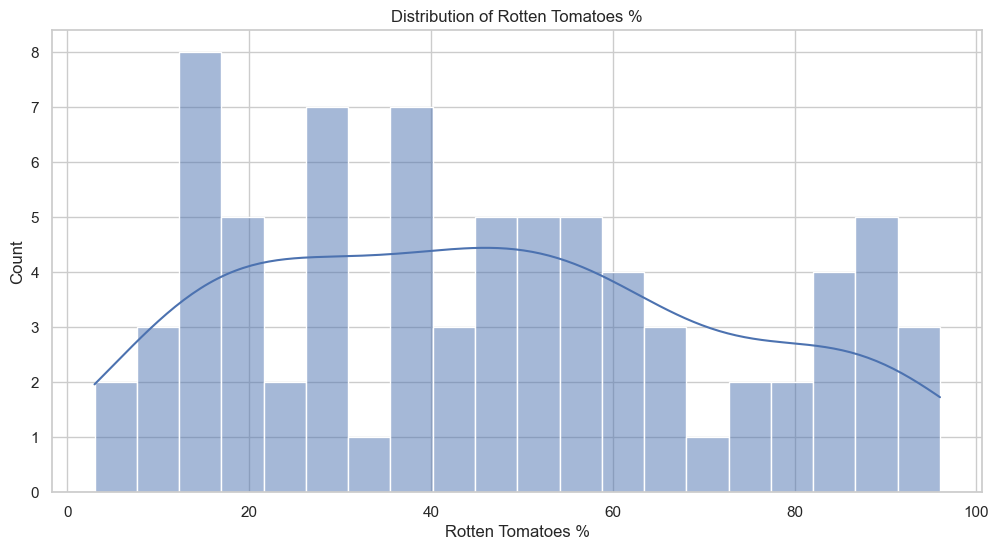

In [24]:
# Distribution of Rotten Tomatoes %
plt.figure(figsize=(12, 6))
sns.histplot(df['Rotten Tomatoes %'], bins=20, kde=True)
plt.title('Distribution of Rotten Tomatoes %')
plt.xlabel('Rotten Tomatoes %')
plt.show()

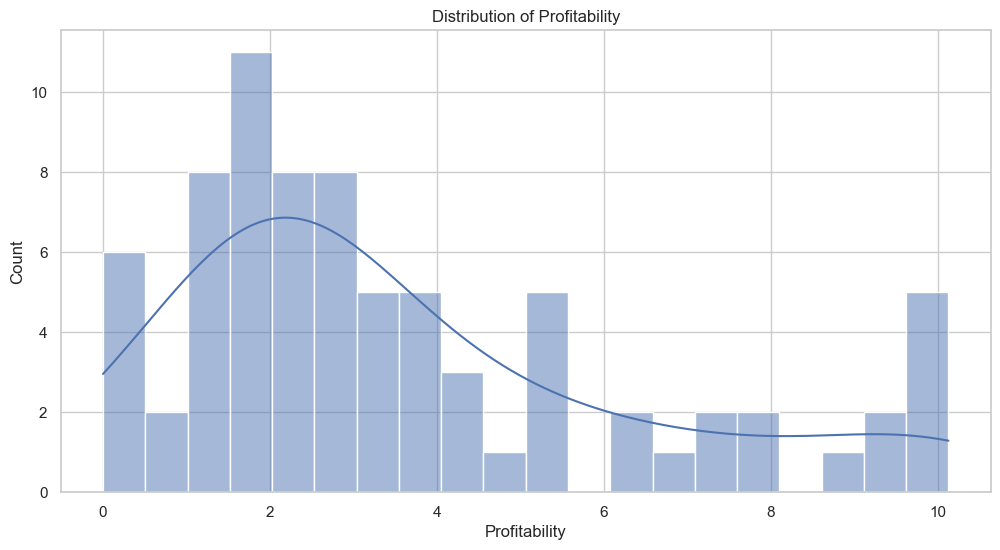

In [25]:
# Distribution of Profitability (with outliers imputed)
plt.figure(figsize=(12, 6))
sns.histplot(df['Profitability'], bins=20, kde=True)
plt.title('Distribution of Profitability')
plt.xlabel('Profitability')
plt.show()

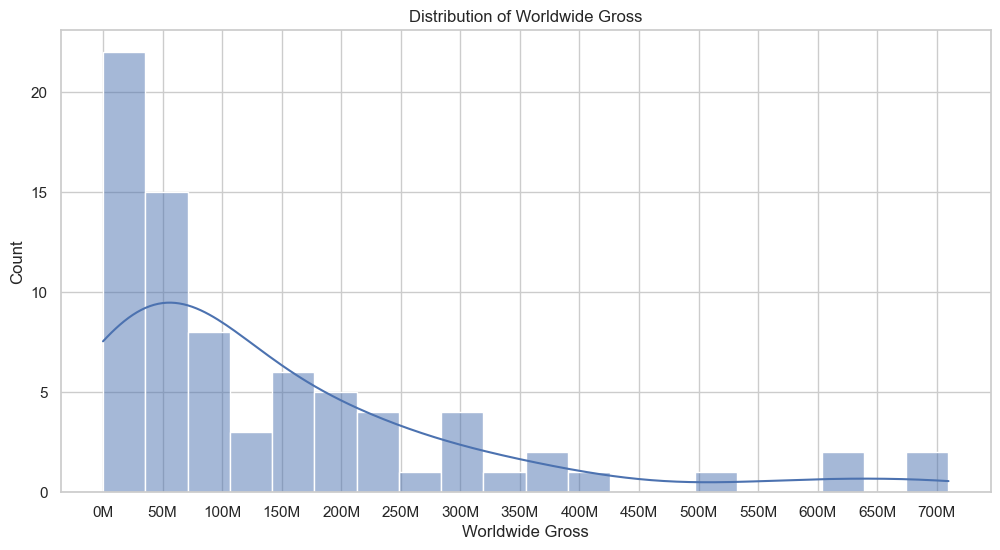

In [26]:
# Distribution of Worldwide Gross
plt.figure(figsize=(12, 6))
sns.histplot(df['Worldwide Gross'], bins=20, kde=True)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.xticks(ticks=np.arange(0, df['Worldwide Gross'].max(), step=5e7),
           labels=['{:.0f}M'.format(x/1e6) for x in np.arange(0, df['Worldwide Gross'].max(), step=5e7)])
plt.show()

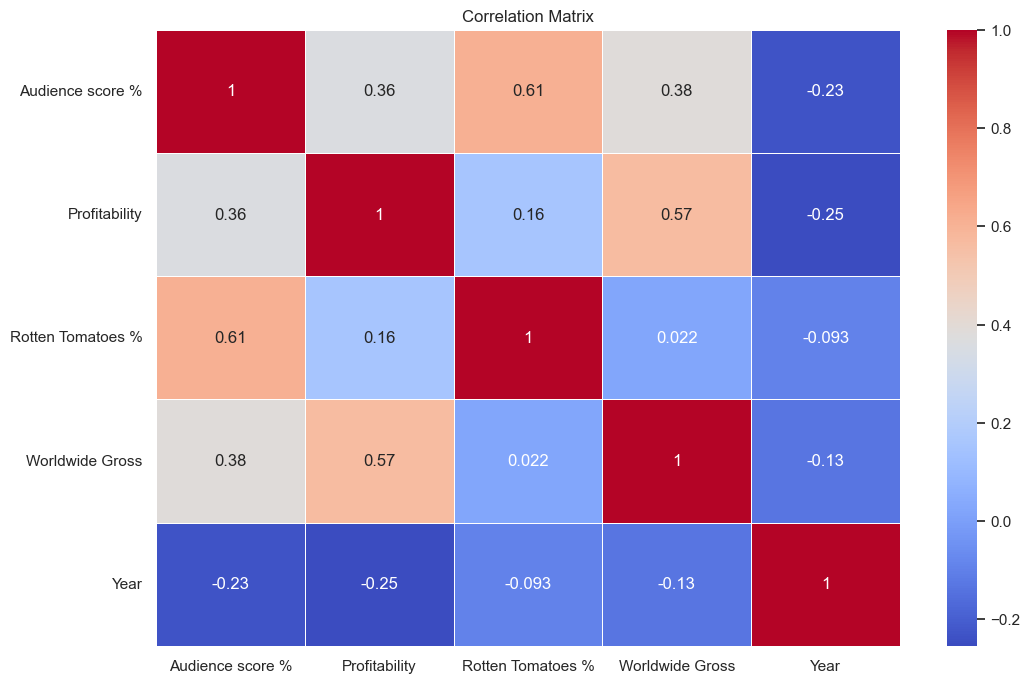

In [27]:
# Correlation matrix (numeric columns only)
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

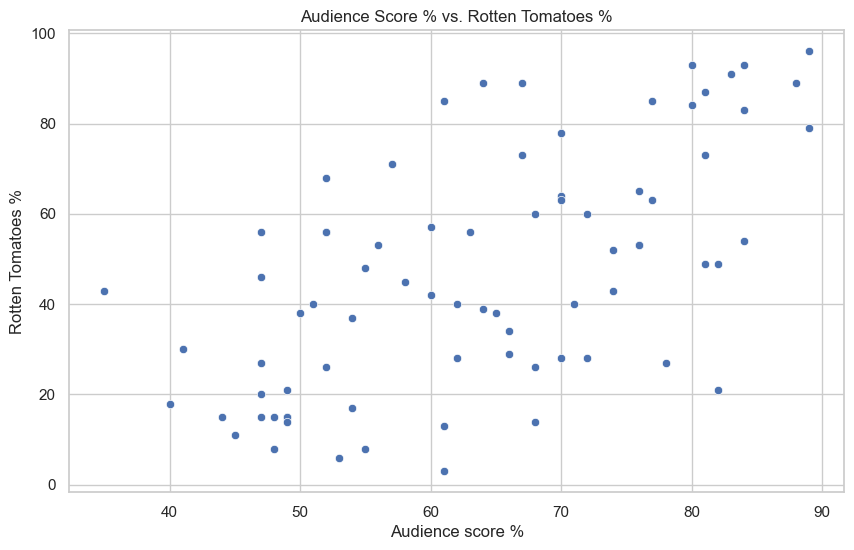

In [28]:
# Scatter plot: Audience score % vs. Rotten Tomatoes %
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Audience score %', y='Rotten Tomatoes %')
plt.title('Audience Score % vs. Rotten Tomatoes %')
plt.show()

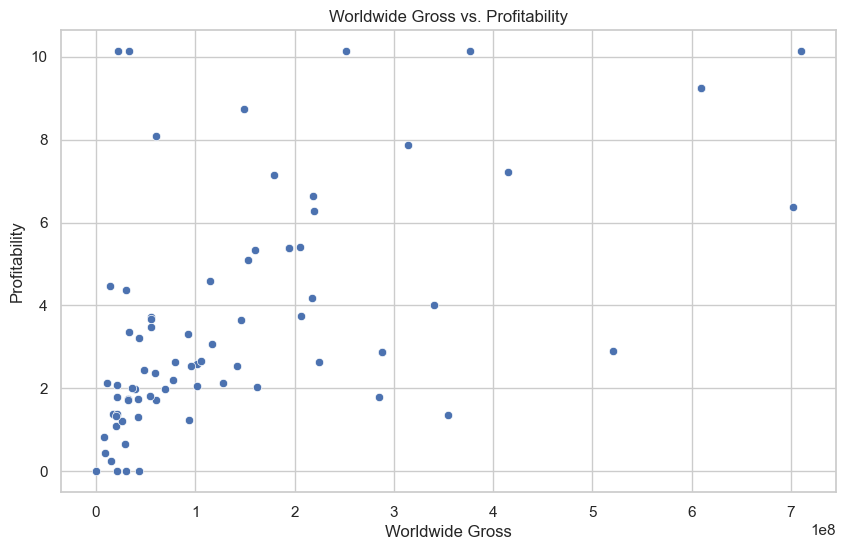

In [29]:
# Scatter plot: Worldwide Gross vs. Profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Worldwide Gross', y='Profitability')
plt.title('Worldwide Gross vs. Profitability')
plt.show()

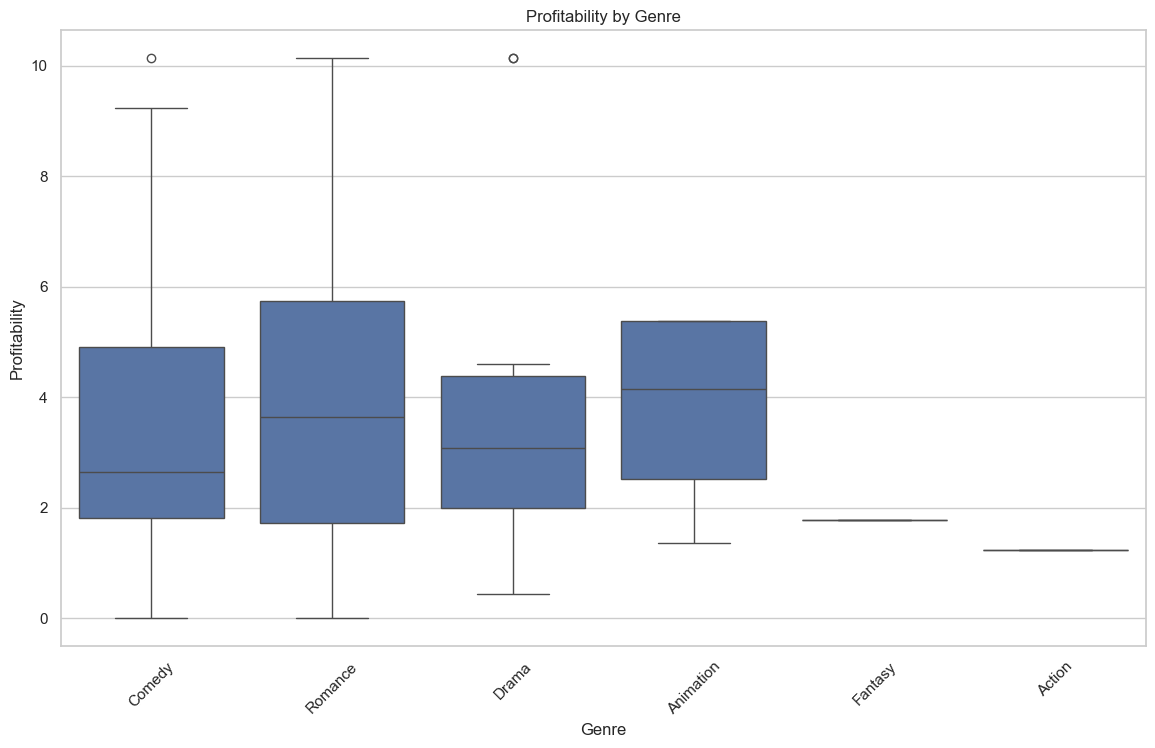

In [30]:
# Box plot: Profitability by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Genre', y='Profitability', order=df['Genre'].value_counts().index)
plt.title('Profitability by Genre')
plt.xticks(rotation=45)
plt.show()

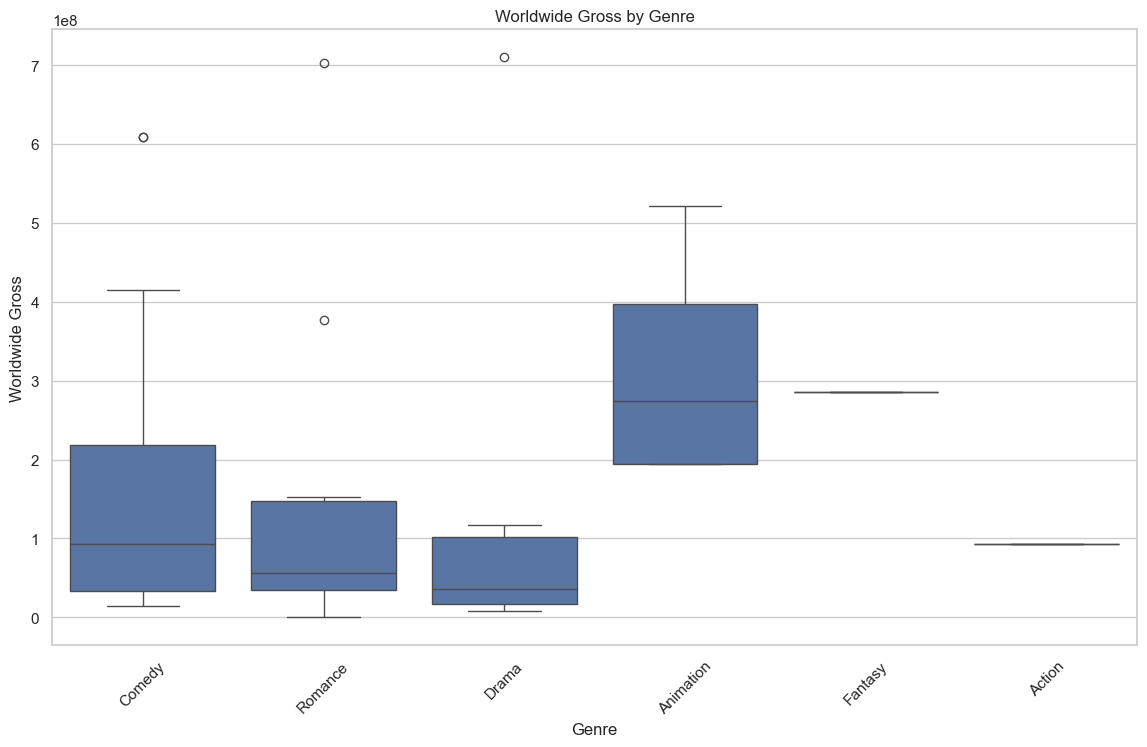

In [31]:
# Box plot: Worldwide Gross by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Genre', y='Worldwide Gross', order=df['Genre'].value_counts().index)
plt.title('Worldwide Gross by Genre')
plt.xticks(rotation=45)
plt.show()

In [32]:
print("Summary of EDA Findings")
print(f"1. Most Common Genres:\n{df['Genre'].value_counts().head()}\n")
print(f"2. Yearly Distribution of Movies:\n{df['Year'].value_counts().sort_index()}\n")
print(f"3. Audience Score % Distribution:\n{df['Audience score %'].describe()}\n")
print(f"4. Rotten Tomatoes % Distribution:\n{df['Rotten Tomatoes %'].describe()}\n")
print(f"5. Profitability Distribution:\n{df['Profitability'].describe()}\n")
print(f"6. Worldwide Gross Distribution:\n{df['Worldwide Gross'].describe()}\n")
print("7. Correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr())

Summary of EDA Findings
1. Most Common Genres:
Genre
Comedy       43
Romance      15
Drama        13
Animation     4
Fantasy       1
Name: count, dtype: int64

2. Yearly Distribution of Movies:
Year
2007    11
2008    20
2009    12
2010    20
2011    14
Name: count, dtype: int64

3. Audience Score % Distribution:
count    77.000000
mean     63.727273
std      13.657113
min      35.000000
25%      52.000000
50%      64.000000
75%      76.000000
max      89.000000
Name: Audience score %, dtype: float64

4. Rotten Tomatoes % Distribution:
count    77.000000
mean     46.701299
std      26.095001
min       3.000000
25%      26.000000
50%      45.000000
75%      64.000000
max      96.000000
Name: Rotten Tomatoes %, dtype: float64

5. Profitability Distribution:
count    77.000000
mean      3.629880
std       2.803228
min       0.000000
25%       1.751351
50%       2.642353
75%       5.103117
max      10.130765
Name: Profitability, dtype: float64

6. Worldwide Gross Distribution:
count    7.7